In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

colors = sns.color_palette('pastel')[0:5]
data = pd.read_csv("final_showcase.csv", sep=';').set_index('comp_name')
data['date'] = pd.to_datetime(data.date).values
data

,inn,ogrn,full_name,short_name,addr,form,date,dividents,audit_name,audit_inn,dir_q
comp_name,,,,,,,,,,,
"АО ""ЭЛИОН""",7.735064e+09,1.027700e+09,"Акционерное общество ""ЭЛИОН""","АО ""ЭЛИОН""","индекс 124460, город Москва, город Зеленоград,...",заочное голосование,2020-06-30,Принято решение не выплачивать дивиденды,Финансовые и бухгалтерские консультанты,7.701017e+09,Вопрос не поднимался
"ПАО ""МТС-Банк""",7.702045e+09,1.027739e+09,"Публичное акционерное общество ""МТС - Банк""","ПАО ""МТС - Банк""","индекс 115432, город Москва, проспект Андропов...",заочное голосование,2020-06-29,Принято решение не выплачивать дивиденды,МТС-Банк,7.703098e+09,Вопрос поднимался
"АО ""Ситиматик""",7.725727e+09,1.117746e+09,"Акционерное общество ""Управление отходами""","АО ""Управление отходами""",город Москва,заочное голосование,2020-06-30,Принято решение не выплачивать дивиденды,Аудит и право,NaN,Вопрос поднимался
ПАО «Европейская Электротехника»,7.716814e+09,1.167746e+09,"Публичное акционерное общество ""Европейская Эл...","ПАО ""Европейская Электротехника""","индекс 129344, город Москва, улица Лётчика Баб...",заочное голосование,2020-06-26,Принято решение не выплачивать дивиденды,Европейская Электротехника,7.701017e+09,Вопрос поднимался
"АО ""Борхиммаш""",3.604001e+09,1.023601e+09,"Акционерное общество ""Борисоглебский ордена Тр...","АО ""Борхиммаш""","индекс 397164, область Воронежская, город Бори...",заочное,2020-06-30,Принято решение выплачивать дивиденды,NaN,NaN,Вопрос не поднимался
...,...,...,...,...,...,...,...,...,...,...,...
"АО ""Молодая гвардия""",7.707082e+09,1.027740e+09,"Акционерное общество ""Молодая гвардия""","АО ""Молодая гвардия""","индекс 127015, город Москва, дом 5А, строение ...",очное,2020-02-04,Принято решение не выплачивать дивиденды,"Общество с ограниченной ответственностью ""Инт...",NaN,Вопрос не поднимался
"ОАО ""Тулаавтотранс""",7.107004e+09,1.027101e+09,"Открытое акционерное общество ""Тулаавтотранс""","ОАО ""Тулаавтотранс""","индекс 300600, страна РФ, город Тула, улица Ту...",собрание,2020-03-26,Принято решение не выплачивать дивиденды,Аудит-Сервис,NaN,Вопрос поднимался
"ПАО ""Группа Черкизово""",7.718561e+09,1.057748e+09,"Публичное акционерное общество ""Группа Черкизово""","ПАО ""Группа Черкизово""","область Московская, город Кашира, деревня Топк...",очное,2020-01-04,Принято решение выплачивать дивиденды,Делойт и Туш СНГ,NaN,Вопрос поднимался


In [ ]:
show_data = data.groupby('dividents').count().inn
show_data

dividents
Вопрос не поднимался                        233
Принято решение выплачивать дивиденды       281
Принято решение не выплачивать дивиденды    559
Name: inn, dtype: int64

In [ ]:
show_data.index

Index(['Вопрос не поднимался', 'Принято решение выплачивать дивиденды',
       'Принято решение не выплачивать дивиденды'],
      dtype='object', name='dividents')

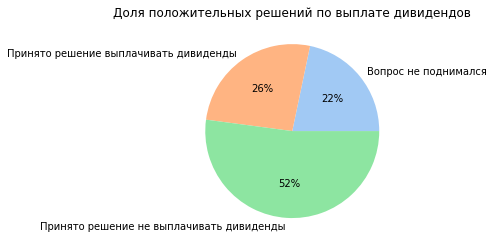

In [ ]:
plt.pie(show_data, labels = show_data.index, colors = colors, autopct='%.0f%%')
plt.title('Доля положительных решений по выплате дивидендов')
plt.show()

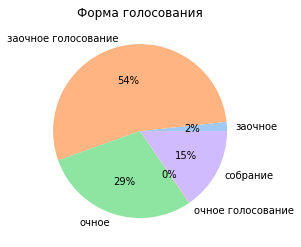

In [ ]:
show_data = data.groupby('form').count().inn
plt.pie(show_data, labels = show_data.index, colors = colors, autopct='%.0f%%')
plt.title('Форма голосования')
plt.show()

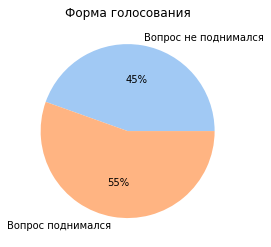

In [ ]:
show_data = data.groupby('dir_q').count().inn
plt.pie(show_data, labels = show_data.index, colors = colors, autopct='%.0f%%')
plt.title('Форма голосования')
plt.show()

In [ ]:
data.audit_inn.unique().shape[0]

118

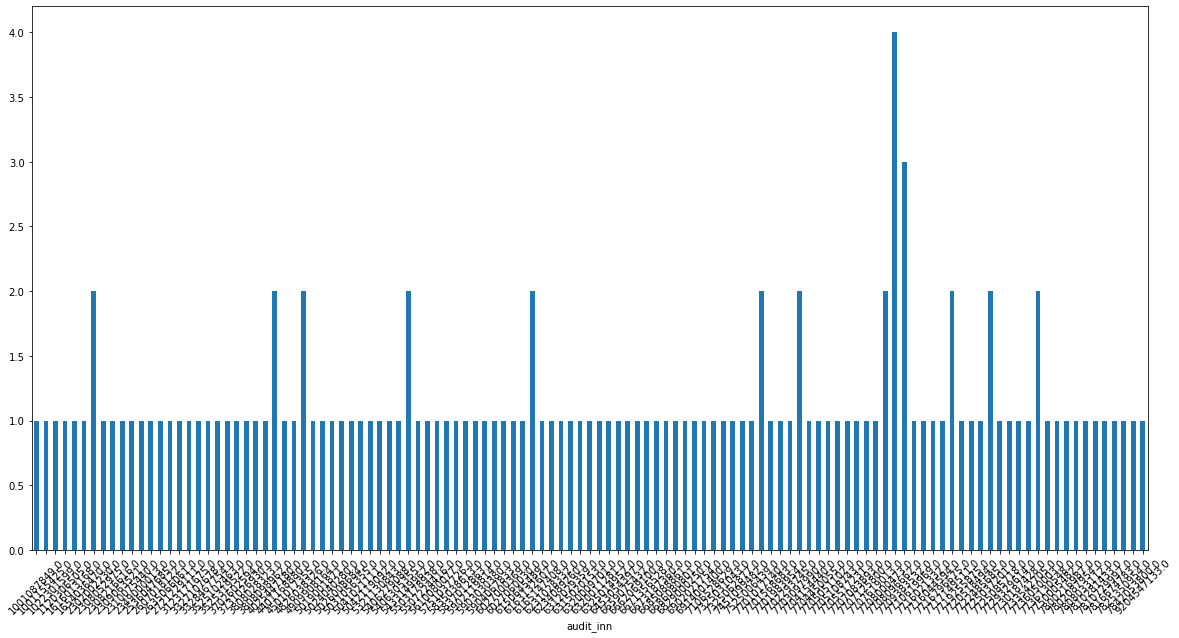

In [ ]:
show_data = data.groupby('audit_inn').count().inn
show_data.plot.bar(rot=45, figsize=(20, 10))

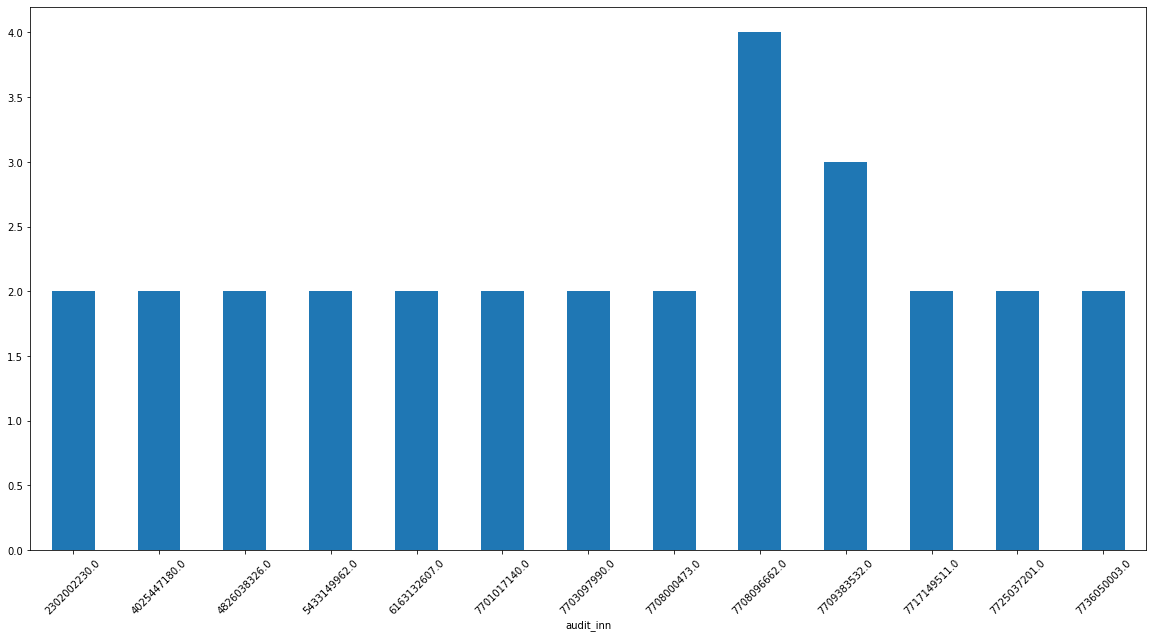

In [ ]:
show_data.loc[show_data > 1].plot.bar(rot=45, figsize=(20, 10))

In [ ]:
show_data = data.groupby('date').count().inn
#show_data = pd.concat([pd.Series(show_data.index), pd.Series(show_data.values)], axis=1)
#show_data.sort_values(by='date', inplace=True)
show_data.sort_index(inplace=True)
show_data

date
1920-06-25     1
2018-04-24     1
2018-12-07     1
2019-04-18     1
2019-05-26     1
              ..
2020-10-06    13
2020-11-05     2
2020-11-06    14
2020-12-05    10
2020-12-06     2
Name: inn, Length: 87, dtype: int64

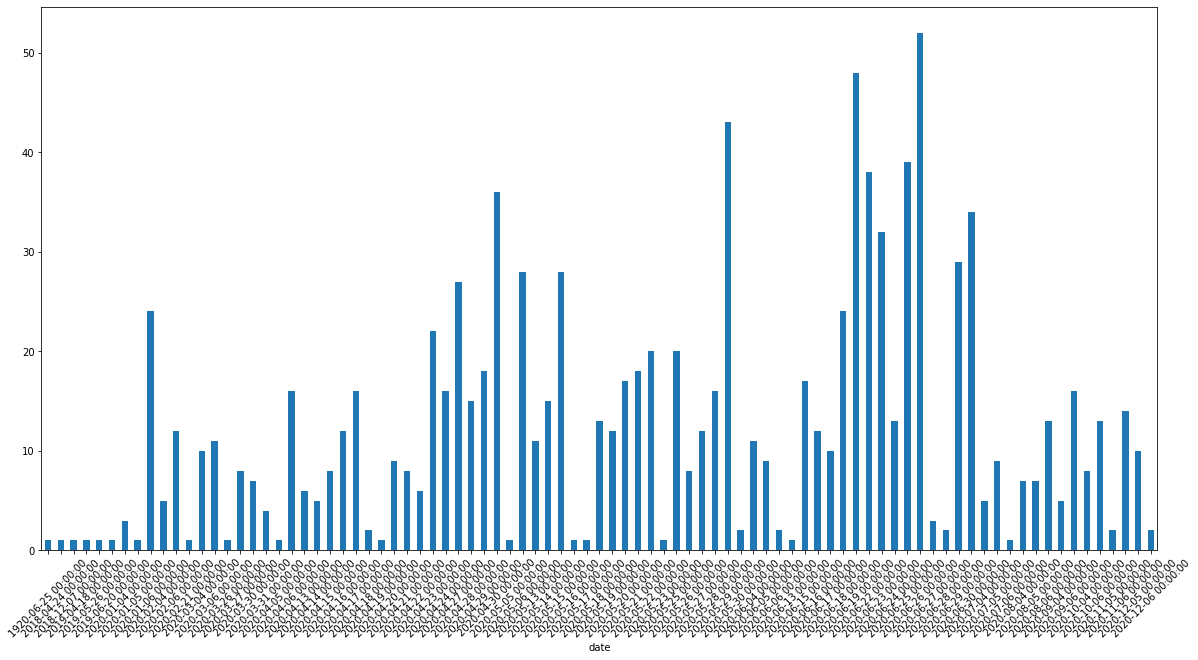

In [ ]:
show_data.plot.bar(rot=45, figsize=(20, 10))

In [ ]:
folium.Map(location = [27.664827, -81.516], zoom_start = 4)